# 2020. 1. 30. 텍스트 마이닝

## 1. 한글 텍스트 전처리

In [2]:
import re
import konlpy

- 대한민국 헌법개정안을 불러온 후 하나의 string으로 변경해주기

In [4]:
with open('대한민국 헌법개정안.txt', 'r', encoding='utf-8') as f:
    text = f.readlines()

In [13]:
text

['전문 \n',
 '\n',
 '유구한 역사와 전통에 빛나는 우리 대한국민은 3ㆍ1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4ㆍ19혁명, 부마민주항쟁과 5ㆍ18민주화운동, 6ㆍ10항쟁의 민주이념을 계승하고, 조국의 민주개혁과 평화 통일의 사명을 바탕으로 정의ㆍ인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자치와 분권을 강화하고, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치ㆍ경제ㆍ사회ㆍ문화의 모든 영역에서 개개인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상과 지역 간 균형발전을 도모하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 자연과의 공존 속에서 우리들과 미래 세대의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 9차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다. \n',
 '\n',
 '\n',
 '제1장 총강 \n',
 '\n',
 '\n',
 '제1조 ① 대한민국은 민주공화국이다. \n',
 '\n',
 '② 대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n',
 '\n',
 '③ 대한민국은 지방분권국가를 지향한다. \n',
 '\n',
 '\n',
 '제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다. \n',
 '\n',
 '② 국가는 법률로 정하는 바에 따라 재외국민을 보호할 의무를 진다.\n',
 '\n',
 '\n',
 '제3조 ① 대한민국의 영토는 한반도와 그 부속도서(附屬島嶼)로 한다.\n',
 '\n',
 '② 대한민국의 수도에 관한 사항은 법률로 정한다. \n',
 '\n',
 '\n',
 '제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 바탕을 둔 평화 통일 정책을 수립하여 추진한다. \n',
 '\n',
 '\n',
 '제5조 ① 대한민국은 국제평화를 

> 1. list comprehension을 이용해 빈 줄과 문장 양 끝단의 공백 제거

> 2. 텍스트 전처리를 위해 다시 하나의 string으로 묶기

In [11]:
text_strip = list([i.strip() for i in text if i != '\n'])

In [14]:
text_join = ' '.join(text_strip)

In [15]:
text_join

'전문 유구한 역사와 전통에 빛나는 우리 대한국민은 3ㆍ1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4ㆍ19혁명, 부마민주항쟁과 5ㆍ18민주화운동, 6ㆍ10항쟁의 민주이념을 계승하고, 조국의 민주개혁과 평화 통일의 사명을 바탕으로 정의ㆍ인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자치와 분권을 강화하고, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치ㆍ경제ㆍ사회ㆍ문화의 모든 영역에서 개개인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상과 지역 간 균형발전을 도모하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 자연과의 공존 속에서 우리들과 미래 세대의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 9차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다. 제1장 총강 제1조 ① 대한민국은 민주공화국이다. ② 대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다. ③ 대한민국은 지방분권국가를 지향한다. 제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다. ② 국가는 법률로 정하는 바에 따라 재외국민을 보호할 의무를 진다. 제3조 ① 대한민국의 영토는 한반도와 그 부속도서(附屬島嶼)로 한다. ② 대한민국의 수도에 관한 사항은 법률로 정한다. 제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 바탕을 둔 평화 통일 정책을 수립하여 추진한다. 제5조 ① 대한민국은 국제평화를 유지하기 위하여 노력하고 침략적 전쟁을 부인한다. ② 국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며 그 정치적 중립성은 준수된다. 제6조 ① 헌법에 따라 체결ㆍ공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다. ② 외국인에게는 국제법과 조약으로 정하는 바에 따라 그 지위를 보장한다. 제7조 ① 공무

## 본격적인 한글 텍스트 전처리 시작

## 1) Text Cleaning

In [18]:
# 특수문자 제거
filtered_content = re.sub(r'[^\d\s\w]', ' ', text_join)

# 원기호 및 ㆍ 제거
filtered_content = re.sub(r'[①②③④⑤⑥⑦⑧⑨⑩ㆍ]', ' ', filtered_content)

print(filtered_content)

전문 유구한 역사와 전통에 빛나는 우리 대한국민은 3 1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4 19혁명  부마민주항쟁과 5 18민주화운동  6 10항쟁의 민주이념을 계승하고  조국의 민주개혁과 평화 통일의 사명을 바탕으로 정의 인도와 동포애로써 민족의 단결을 공고히 하고  모든 사회적 폐습과 불의를 타파하며  자치와 분권을 강화하고  자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치 경제 사회 문화의 모든 영역에서 개개인의 기회를 균등히 하고  능력을 최고도로 발휘하게 하며  자유와 권리에 따르는 책임과 의무를 완수하게 하여  안으로는 국민생활의 균등한 향상과 지역 간 균형발전을 도모하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 자연과의 공존 속에서 우리들과 미래 세대의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 9차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다  제1장 총강 제1조   대한민국은 민주공화국이다    대한민국의 주권은 국민에게 있고  모든 권력은 국민으로부터 나온다    대한민국은 지방분권국가를 지향한다  제2조   대한민국의 국민이 되는 요건은 법률로 정한다    국가는 법률로 정하는 바에 따라 재외국민을 보호할 의무를 진다  제3조   대한민국의 영토는 한반도와 그 부속도서 附屬島嶼 로 한다    대한민국의 수도에 관한 사항은 법률로 정한다  제4조 대한민국은 통일을 지향하며  자유민주적 기본질서에 바탕을 둔 평화 통일 정책을 수립하여 추진한다  제5조   대한민국은 국제평화를 유지하기 위하여 노력하고 침략적 전쟁을 부인한다    국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며 그 정치적 중립성은 준수된다  제6조   헌법에 따라 체결 공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다    외국인에게는 국제법과 조약으로 정하는 바에 따라 그 지위를 보장한다  제7조   공무원

## 2) 형태소 분석기를 이용해
##      Tokenization, POS tagging, Lemmatization

- Twitter 분석기 이용(현재는 이름이 Okt로 변경됐지만 그대로 이용 가능)

In [19]:
twitter = konlpy.tag.Twitter()
twitter_morphs = twitter.pos(filtered_content)
print(twitter_morphs)

C:\USER\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
C:\USER\Anaconda3\lib\site-packages\jpype\_core.py:218: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


[('전문', 'Noun'), ('유구', 'Noun'), ('한', 'Josa'), ('역사', 'Noun'), ('와', 'Josa'), ('전통', 'Noun'), ('에', 'Josa'), ('빛나는', 'Verb'), ('우리', 'Noun'), ('대', 'Modifier'), ('한', 'Modifier'), ('국민', 'Noun'), ('은', 'Josa'), ('3', 'Number'), ('1', 'Number'), ('운동', 'Noun'), ('으로', 'Josa'), ('건립', 'Noun'), ('된', 'Verb'), ('대한민국', 'Noun'), ('임시정부', 'Noun'), ('의', 'Josa'), ('법', 'Noun'), ('통과', 'Noun'), ('불의', 'Noun'), ('에', 'Josa'), ('항거', 'Noun'), ('한', 'Josa'), ('4', 'Number'), ('19', 'Number'), ('혁명', 'Noun'), ('부마', 'Noun'), ('민주', 'Noun'), ('항쟁', 'Noun'), ('과', 'Josa'), ('5', 'Number'), ('18', 'Number'), ('민주화', 'Noun'), ('운동', 'Noun'), ('6', 'Number'), ('10', 'Number'), ('항쟁', 'Noun'), ('의', 'Josa'), ('민주', 'Noun'), ('이념', 'Noun'), ('을', 'Josa'), ('계승', 'Noun'), ('하고', 'Josa'), ('조국', 'Noun'), ('의', 'Josa'), ('민주', 'Noun'), ('개혁', 'Noun'), ('과', 'Josa'), ('평화', 'Noun'), ('통일', 'Noun'), ('의', 'Josa'), ('사명', 'Noun'), ('을', 'Josa'), ('바탕', 'Noun'), ('으로', 'Josa'), ('정의', 'Noun'), ('인도', 'Noun'), 

- komoran 분석기 이용

In [20]:
komoran = konlpy.tag.Komoran()
komoran_morphs = komoran.pos(filtered_content)
print(komoran_morphs)

[('전문', 'NNG'), ('유구', 'XR'), ('하', 'XSA'), ('ㄴ', 'ETM'), ('역사', 'NNG'), ('와', 'JC'), ('전통', 'NNG'), ('에', 'JKB'), ('빛나', 'VV'), ('는', 'ETM'), ('우리', 'NP'), ('대하', 'VV'), ('ㄴ', 'ETM'), ('국민', 'NNP'), ('은', 'JX'), ('3', 'SN'), ('1', 'SN'), ('운동', 'NNP'), ('으로', 'JKB'), ('건립', 'NNG'), ('되', 'XSV'), ('ㄴ', 'ETM'), ('대한민국', 'NNP'), ('임시', 'NNG'), ('정부', 'NNG'), ('의', 'JKG'), ('법통', 'NNG'), ('과', 'JC'), ('불의', 'NNP'), ('에', 'JKB'), ('항거', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('4', 'SN'), ('19', 'SN'), ('혁명', 'NNP'), ('부마민주항쟁', 'NNP'), ('과', 'JC'), ('5', 'SN'), ('18', 'SN'), ('민주화', 'NNP'), ('운동', 'NNP'), ('6', 'SN'), ('10', 'SN'), ('항쟁', 'NNG'), ('의', 'JKG'), ('민주', 'NNP'), ('이념', 'NNG'), ('을', 'JKO'), ('계승', 'NNG'), ('하', 'XSV'), ('고', 'EC'), ('조국', 'NNP'), ('의', 'JKG'), ('민주개혁', 'NNG'), ('과', 'JC'), ('평화', 'NNG'), ('통일', 'NNG'), ('의', 'JKG'), ('사명', 'NNG'), ('을', 'JKO'), ('바탕', 'NNG'), ('으로', 'JKB'), ('정', 'NNP'), ('의', 'JKG'), ('인도', 'NNP'), ('와', 'JC'), ('동포애', 'NNG'), ('로써', 'JKB'), ('민족

In [22]:
# komoran은 명사만 따로 볼 수 있는 함수를 제공.
# twitter는 명사 단어만 추출하는 알고리즘을 짜줘야 함.
print(komoran.nouns(filtered_content))

['전문', '역사', '전통', '국민', '운동', '건립', '대한민국', '임시', '정부', '법통', '불의', '항거', '혁명', '부마민주항쟁', '민주화', '운동', '항쟁', '민주', '이념', '계승', '조국', '민주개혁', '평화', '통일', '사명', '바탕', '정', '인도', '동포애', '민족', '단결', '사회', '폐습', '불의', '타파', '자치', '분권', '강화', '자율', '조화', '바탕', '자유', '민주', '기본', '질서', '정치', '경제', '사회', '문화', '영역', '개개인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '균등', '향상', '지역', '간', '균형발전', '도모', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '자연', '공존', '속', '미래', '세대', '안전', '자유', '행복', '확보', '것', '다짐', '년', '7월 12일', '제정', '차', '개정', '헌법', '국회', '의결', '국민', '투표', '개정', '장', '강', '대한민국', '민주공화국', '이다', '대한민국', '주권', '국민', '권력', '국민', '대한민국', '지방', '분권', '국가', '지향', '대한민국', '국민', '요건', '법률', '국가', '법률', '바', '재외국민', '보호', '의무', '진다', '대한민국', '영토', '한반도', '부속', '도서', '로', '대한민국', '수도', '사항', '법률', '대한민국', '통일', '지향', '자유', '민주', '기본', '질서', '바탕', '평화', '통일', '정책', '수립', '추진', '대한민국', '국제', '평화', '유지', '노력', '침략', '전쟁', '부인', '국군', '국가', '안전', '보장', '국토방위', '신성

In [27]:
Noun_words = list([word for word, pos in twitter_morphs if pos=='Noun'])
print(Noun_words)

['전문', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '혁명', '부마', '민주', '항쟁', '민주화', '운동', '항쟁', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '바탕', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자치', '분권', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '개개인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '향상', '지역', '간', '균형발전', '도모', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '함', '자연', '공존', '속', '우리', '미래', '세대', '안전', '자유', '행복', '확보', '것', '다짐', '제정', '차', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '제', '장', '강', '제', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '대한민국', '지방', '분권', '국가', '지향', '제', '대한민국', '국민', '요건', '법률', '정', '국가', '법률', '정', '바', '재외국민', '보호', '의무', '제', '대한민국', '영토', '한반도', '그', '부속', '도서', '로', '대한민국', '수도', '관', '사항', '법률', '정', '제', '대한민국', '통일', '지향', '자유민주', '질서', '바탕', '평화', '통일', '정책', '수립', '추진', '제', '대한민국', '국

## 3) 불용어 제거

- 불용어 제거를 위해선 별도의 사전(list 변수)을 구축해야 함.
- 한국어에서 한 글자는 대부분 의미가 없는 것들이 많아 한 글자도 지워주면 좋음.
- 예) 것, 때, 그, 시, 곳

In [29]:
stopwords = ['제', '장']
unique_Noun_words = set(Noun_words)
for word in unique_Noun_words:
    if word in stopwords or len(word) == 1:
        while word in Noun_words:
            Noun_words.remove(word)

In [32]:
print(len(Noun_words))
print(len(set(Noun_words)))
print(Noun_words)

3680
919
['전문', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '통과', '불의', '항거', '혁명', '부마', '민주', '항쟁', '민주화', '운동', '항쟁', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '바탕', '정의', '인도', '동포', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자치', '분권', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '개개인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '국민', '생활', '향상', '지역', '균형발전', '도모', '항구', '세계', '평화', '인류', '공영', '이바지', '자연', '공존', '우리', '미래', '세대', '안전', '자유', '행복', '확보', '다짐', '제정', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '대한민국', '지방', '분권', '국가', '지향', '대한민국', '국민', '요건', '법률', '국가', '법률', '재외국민', '보호', '의무', '대한민국', '영토', '한반도', '부속', '도서', '대한민국', '수도', '사항', '법률', '대한민국', '통일', '지향', '자유민주', '질서', '바탕', '평화', '통일', '정책', '수립', '추진', '대한민국', '국제', '평화', '유지', '노력', '침략', '전쟁', '부인', '국군', '국가', '안전보장', '국토', '방위', '의무', '수행', '사명', '정치', '중립성', '준수', '헌

## 2. 빈도 분석

- 빈도분석을 위해선 Counter 모듈 이용

In [35]:
from collections import Counter
c = Counter(Noun_words)
print(c)

Counter({'법률': 161, '대통령': 91, '국가': 84, '국회': 66, '국민': 51, '경우': 49, '헌법': 48, '모든': 41, '사항': 40, '권리': 35, '사람': 30, '지방정부': 25, '선거': 24, '시행': 23, '직무': 22, '회의': 22, '국무총리': 22, '경제': 21, '조직': 21, '이상': 21, '의원': 21, '임명': 21, '거나': 20, '자유': 19, '정책': 19, '보장': 19, '정부': 19, '국무위원': 19, '위원': 19, '의무': 18, '국회의원': 18, '헌법재판소': 17, '임기': 17, '범위': 17, '권한': 17, '선출': 16, '항의': 16, '감사': 16, '위원회': 16, '사무': 16, '보호': 15, '정당': 15, '재적': 15, '대법원': 15, '의결': 14, '수행': 14, '공무원': 14, '절차': 14, '법관': 14, '다만': 14, '법원': 14, '재판': 14, '대법관': 14, '노력': 13, '조약': 13, '구성': 13, '구체': 13, '과반수': 13, '대한민국': 12, '개정': 12, '효력': 12, '위반': 12, '심판': 12, '요구': 12, '출석': 12, '찬성': 12, '탄핵': 12, '대한': 11, '투표': 11, '동의': 11, '재판관': 11, '관리': 11, '득표': 11, '주민': 11, '자치': 10, '정치': 10, '제정': 10, '유지': 10, '안전보장': 10, '공포': 10, '형사': 10, '제한': 10, '처분': 10, '예산': 10, '사회': 9, '최고': 9, '생활': 9, '발전': 9, '누구': 9, '체포': 9, '결정': 9, '부의': 9, '제출': 9, '행정각부': 9, '명령': 9, '지방의회': 9, '당시': 9, '질서': 8

In [36]:
print(c.most_common(10))

[('법률', 161), ('대통령', 91), ('국가', 84), ('국회', 66), ('국민', 51), ('경우', 49), ('헌법', 48), ('모든', 41), ('사항', 40), ('권리', 35)]


- WordCloud 모듈을 이용한 워드클라우드 생성
- 시각화를 위해 matplotlib 모듈을 이용
- 폰트를 가져오기 위해 path 모듈 이용

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

In [48]:
# 한글 폰트를 가져와야 함.(본인 컴퓨터에서 가져오면 됨.)
FONT_PATH = 'BMYEONSUNG_ttf.ttf'

# generate() 는 하나의 string value를 입력 받음
noun_text = ' '.join(Noun_words)

print(noun_text)

전문 유구 역사 전통 우리 국민 운동 건립 대한민국 임시정부 통과 불의 항거 혁명 부마 민주 항쟁 민주화 운동 항쟁 민주 이념 계승 조국 민주 개혁 평화 통일 사명 바탕 정의 인도 동포 로써 민족 단결 공고 모든 사회 폐습 불의 타파 자치 분권 자율 조화 바탕 자유민주 질서 더욱 정치 경제 사회 문화 모든 영역 개개인 기회 능력 최고 도로 발휘 자유 권리 책임 의무 완수 국민 생활 향상 지역 균형발전 도모 항구 세계 평화 인류 공영 이바지 자연 공존 우리 미래 세대 안전 자유 행복 확보 다짐 제정 개정 헌법 이제 국회 의결 국민투표 개정 대한민국 민주공화국 대한민국 주권 국민 모든 권력 국민 대한민국 지방 분권 국가 지향 대한민국 국민 요건 법률 국가 법률 재외국민 보호 의무 대한민국 영토 한반도 부속 도서 대한민국 수도 사항 법률 대한민국 통일 지향 자유민주 질서 바탕 평화 통일 정책 수립 추진 대한민국 국제 평화 유지 노력 침략 전쟁 부인 국군 국가 안전보장 국토 방위 의무 수행 사명 정치 중립성 준수 헌법 체결 공포 조약 일반 승인 국제 법규 국내법 효력 외국인 국제 조약 지위 보장 공무원 국민 전체 봉사 국민 대하 책임 공무원 신분 법률 보장 공무원 직무 수행 정치 중립 공무원 재직 퇴직 공무원 직무 공정 성과 청렴 훼손 정당 설립 복수정당제 보장 정당 목적 조직 활동 민주 정당 법률 국가 보호 국가 목적 기준 법률 정당 운영 자금 보조 정부 정당 목적 활동 민주 질서 위반 헌법재판소 정당 해산 제소 제소 정당 헌법재판소 심판 해산 국가 문화 자율성 다양성 증진 전통문화 발전 계승 노력 기본 권리 의무 모든 사람 인간 존엄 가치 가지 행복 추구 권리 국가 개인 불가침 기본 인권 확인 보장 의무 모든 사람 누구 성별 종교 장애 연령 인종 지역 사회 신분 이유 정치 경제 사회 문화 생활 모든 영역 차별 국가 성별 장애 차별 상태 시정 실질 평등 실현 노력 사회 특수 계급 제도 인정 형태 창설 훈장 비롯 영전 효력 특권 모든 사람 생명 가지 신체 정신 훼손 

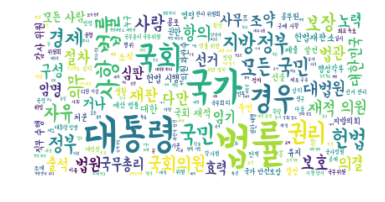

In [49]:
wordcloud = WordCloud(max_font_size=60, relative_scaling=.5, font_path=FONT_PATH, background_color='white')
wordcloud.generate(noun_text) 

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 3. 미등록 단어 문제

- komoran과 twitter를 이용해 미등록 단어 문제를 수작업으로 해결할 수 있지만, 형태론적 방법론과 확률 방법론을 이용해 미등록 단어를 추출해내는 모듈이 이미 존재.
- (이상엽, 2018) kornounextractor 모듈 (https://github.com/sangyup-lee/korean_noun_extractor) : 형태론적 방법론 이용
- (김현중, 2018) LRNounExtractor_v2 모듈 (https://github.com/lovit) : 확률적 방법론 이용

In [50]:
twitter = konlpy.tag.Twitter()
komoran = konlpy.tag.Komoran()

C:\USER\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [54]:
text1 = '데사랩은 데이터 사이언스 랩의 약자다'
text2 = '현재 데사랩의 학회장은 이해환이다'

In [58]:
print(twitter.pos(text1))
print('-'*50)
print(twitter.pos(text2))

[('데', 'Noun'), ('사', 'Modifier'), ('랩', 'Noun'), ('은', 'Josa'), ('데이터', 'Noun'), ('사이언스', 'Noun'), ('랩', 'Noun'), ('의', 'Josa'), ('약자', 'Noun'), ('다', 'Josa')]
--------------------------------------------------
[('현재', 'Noun'), ('데', 'Noun'), ('사', 'Modifier'), ('랩', 'Noun'), ('의', 'Josa'), ('학회', 'Noun'), ('장', 'Suffix'), ('은', 'Josa'), ('이', 'Determiner'), ('해환', 'Noun'), ('이다', 'Josa')]


In [59]:
print(komoran.pos(text1))
print('-'*50)
print(komoran.pos(text2))

[('데', 'NNB'), ('사', 'NNG'), ('랩', 'NNG'), ('은', 'JX'), ('데이터', 'NNG'), ('사이언스', 'NNP'), ('랩', 'NNG'), ('의', 'JKG'), ('약자', 'NNP'), ('다', 'JX')]
--------------------------------------------------
[('현재', 'MAG'), ('데', 'NNB'), ('사', 'NNG'), ('랩', 'NNG'), ('의', 'JKG'), ('학회장', 'NNG'), ('은', 'JX'), ('이해', 'NNG'), ('환', 'NNG'), ('이', 'VCP'), ('다', 'EC')]


## 1) Twitter 이용

- ckonlpy에 들어있는 Twitter 모듈을 이용하면 사전을 직접 추가 가능
- add_dictionary 함수를 통해 추가하는 것은 메모리 상에 존재하는 임시 사전이므로 매번 새롭게 등록해야 함

In [60]:
from ckonlpy.tag import Twitter
twitter = Twitter()

C:\USER\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [61]:
twitter.add_dictionary(['데사랩', '이해환'], 'Noun')
print(twitter.pos(text1))
print('-'*50)
print(twitter.pos(text2))

[('데사랩', 'Noun'), ('은', 'Josa'), ('데이터', 'Noun'), ('사이언스', 'Noun'), ('랩', 'Noun'), ('의', 'Josa'), ('약자', 'Noun'), ('다', 'Josa')]
--------------------------------------------------
[('현재', 'Noun'), ('데사랩', 'Noun'), ('의', 'Josa'), ('학', 'Noun'), ('회장', 'Noun'), ('은', 'Josa'), ('이해환', 'Noun'), ('이다', 'Josa')]


## 2) Komoran 이용

- komoran은 새로운 모듈 설치 필요 없음
- 형태소 사전을 외부 txt 파일로 저장해 이용할 수 있는데, 데사랩\tNNG 형식으로 저장돼 있어야 함
- 메모장은 인식이 잘 안 됨. utf-8로 저장해도 잘 안 되기 때문에 가능한 메모장을 사용하지 말고 Notepad++을 다운받아 이용하는 것이 좋음

In [124]:
komoran2 = konlpy.tag.Komoran(userdic='dict_2.txt')

In [125]:
print(komoran2.pos(text1))
print('-'*50)
print(komoran2.pos(text2))

[('데사랩', 'NNG'), ('은', 'JX'), ('데이터', 'NNG'), ('사이언스', 'NNP'), ('랩', 'NNG'), ('의', 'JKG'), ('약자', 'NNP'), ('다', 'JX')]
--------------------------------------------------
[('현재', 'MAG'), ('데사랩', 'NNG'), ('의', 'JKG'), ('학회장', 'NNG'), ('은', 'JX'), ('이해환', 'NNG'), ('이', 'VCP'), ('다', 'EC')]


## 4. 문서 Vectorization

- 문서 벡터화 작업은 Binary, TF, TF*IDF가 있지만 여기서는 TF와 TF*IDF만 다룸
- ScikitLearn에서 제공하는 CountVectorizer(TF를 위함)와 TfidfVectorizer(TF*IDF를 위함)를 이용
- 벡터(DTM, Dcoument Term Matrix)로 완성 후 유클리디안 거리와 코사인 유사도를 통해 문서 간 유사도 분석

In [1]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer # frequency based DTM
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based DTM

In [2]:
def tf_extractor(corpus): 
    # returns a frequency-based DTM
    
    vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1))
    # min_df: minimum document frequency threshold
         # if min_df = 1 -> 최소 적어도 하나의 문서에서 사용된 단어들은 모두 포함
    # ngram_range=(1,1) -> unigram 만 포함
    # ngram_range=(1,3) -> unigram, bi-gram, tri-gram 까지 고려
    
    features = vectorizer.fit_transform(corpus) # transform texts to a frequency matrix
    return vectorizer, features  

In [3]:
def tfidf_extractor(corpus):
    # returns a tf-idf based DTM
    
    vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1,1))
    # ngram_range=(1,1)은 unigram만 쓴다는 것. ngram_range=(1,2)면 bigram까지 사용
    
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features

In [4]:
TEXT = ['banana apple apple eggplant', 
        'orange caret banana eggplant', 
        'apple caret banana banana', 
        'orange banana grape'
]

In [5]:
tf_vectorizer, tf_features = tf_extractor(TEXT)
tfidf_vectorizer, tfidf_features = tfidf_extractor(TEXT)

In [6]:
tf_features = np.array(tf_features.todense())
tfidf_features = np.array(tfidf_features.todense())
print('tf 결과\n', tf_features)
print('-'*50)
print('tfidf 결과\n', tfidf_features)

tf 결과
 [[2 1 0 1 0 0]
 [0 1 1 1 0 1]
 [1 2 1 0 0 0]
 [0 1 0 0 1 1]]
--------------------------------------------------
tfidf 결과
 [[0.85764287 0.28383251 0.         0.42882143 0.         0.        ]
 [0.         0.35696573 0.53931298 0.53931298 0.         0.53931298]
 [0.51623315 0.68337886 0.51623315 0.         0.         0.        ]
 [0.         0.37919167 0.         0.         0.72664149 0.5728925 ]]


In [7]:
feature_names = tf_vectorizer.get_feature_names()
feature_names

['apple', 'banana', 'caret', 'eggplant', 'grape', 'orange']

- 행렬 형태로 보여주기 위한 코드

In [8]:
import pandas as pd
def display_features(features, feature_names):
    df = pd.DataFrame(data=features, columns=feature_names)
    print(df)

In [10]:
display_features(tf_features, feature_names)

   apple  banana  caret  eggplant  grape  orange
0      2       1      0         1      0       0
1      0       1      1         1      0       1
2      1       2      1         0      0       0
3      0       1      0         0      1       1


## 1) 유클리디안 거리 기반 유사도

- 좌표평면에서 두 좌표간 거리를 구하는 것과 동일
- 거리가 짧을수록 두 벡터(문서)가 비슷하다고 보는 것.

In [147]:
doc1 = tf_features[0]
doc2 = tf_features[1]
doc3 = tf_features[2]
doc4 = tf_features[3]

In [148]:
print(np.linalg.norm(doc2-doc1))
print(np.linalg.norm(doc3-doc1))
print(np.linalg.norm(doc4-doc1))
print(np.linalg.norm(doc3-doc2))
print(np.linalg.norm(doc4-doc2))
print(np.linalg.norm(doc4-doc3))

2.449489742783178
2.0
2.6457513110645907
2.0
1.7320508075688772
2.23606797749979


## 2) 코사인유사도 기반 유사도

- 벡터 내적 공식을 이용, 코사인 값을 구해 방향성이 비슷한지를 확인하는 방법
- 코사인 값이 클수록 두 벡터 사이의 각이 좁아 방향이 같아 유사하다고 봄

In [151]:
print(np.dot(doc1, doc2)/(np.linalg.norm(doc1)*np.linalg.norm(doc2)))
print(np.dot(doc1, doc3)/(np.linalg.norm(doc1)*np.linalg.norm(doc3)))
print(np.dot(doc1, doc4)/(np.linalg.norm(doc1)*np.linalg.norm(doc4)))
print(np.dot(doc2, doc3)/(np.linalg.norm(doc2)*np.linalg.norm(doc3)))
print(np.dot(doc2, doc4)/(np.linalg.norm(doc2)*np.linalg.norm(doc4)))
print(np.dot(doc3, doc4)/(np.linalg.norm(doc3)*np.linalg.norm(doc4)))

0.4082482904638631
0.6666666666666667
0.23570226039551587
0.6123724356957946
0.5773502691896258
0.47140452079103173
